EDA do arquivo CSV de CAT de jan a mar/2020

In [2]:
# Carregando alguns módulos essenciais para trabalharmos os dados

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Algumas opções do Pandas boas para vermos muitas linhas e colunas de uma vez
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Carregando os dados
dados_cat = pd.read_csv('cat-comp01-02-03-2020.csv',
                       sep = ";",
                       header = 0,
                       names = ['agente', 'data_acid', 'cbo', 'cbo_1', 'cid10', 'cid10_1', 'cnae', 'cnae_1', 'emitente', 
                               'esp_beneficio', 'filiacao', 'indica_acid', 'municip_empr', 'natureza', 'origem', 'parte', 'sexo', 
                               'tipo_acid', 'uf_acid', 'uf_empr', 'data_afast', 'data_despacho', 'data_acid_1', 'data_nasc',
                               'data_emisao'], 
                       index_col = False,
                       encoding = "cp1252")

In [69]:
dados_cat.head()

,agente,data_acid,cbo,cbo_1,cid10,cid10_1,cnae,cnae_1,emitente,esp_beneficio,filiacao,indica_acid,municip_empr,natureza,origem,parte,sexo,tipo_acid,uf_acid,uf_empr,data_afast,data_despacho,data_acid_1,data_nasc,data_emisao
0,"Vidraria, Fibra de V",2020/01,322230,322230-Auxiliar de E,S610,S61.0 Ferim de Dedos,9491,Atividades de Organi,Empregador,Pa,Empregado,Não,351880-Guarulhos,Lesao Imediata,Internet,Dedo,Feminino,Típico,Maranhão,São Paulo,0000/00,0000/00,01/01/2020,07/09/1977,02/01/2020
1,Agente Infeccioso ou,2020/01,322205,322205-Tec. de Enfer,Z209,Z20.9 Contato Exposi,8610,Atividades de Atendi,Empregador,Pa,Empregado,Não,230440-Fortaleza,"Corte, Laceracao, Fe",Internet,Dedo,Feminino,Típico,{ñ class},Ceará,0000/00,0000/00,02/01/2020,27/11/1987,02/01/2020
2,{ñ class},2020/01,322205,322205-Tec. de Enfer,Y289,Y28.9 Local Ne,8610,Atividades de Atendi,Empregador,Pa,Empregado,Não,355030-São Paulo,"Corte, Laceracao, Fe",Internet,Dedo,Masculino,Típico,Maranhão,São Paulo,0000/00,0000/00,01/01/2020,03/01/1983,02/01/2020
3,"Motor, Bomba, Turbin",2020/01,314410,314410-Tec. em Manut,S610,S61.0 Ferim de Dedos,1012,"Abate de Suinos, Ave",Empregador,Pa,Empregado,Não,420010-Abelardo Luz,"Corte, Laceracao, Fe",Internet,Dedo,Masculino,Típico,{ñ class},Santa Catarina,0000/00,0000/00,02/01/2020,08/10/1988,02/01/2020
4,Ferramenta Portatil,2020/01,724315,724315-Soldador,S610,S61.0 Ferim de Dedos,2599,Fabricacao de Produt,Empregador,Pa,Empregado,Não,310620-Belo Horizont,"Corte, Laceracao, Fe",Internet,Dedo,Masculino,Típico,Rondônia,Minas Gerais,2020/01,0000/00,02/01/2020,10/06/1976,02/01/2020


In [133]:
#Verificando dados com valores estranhos nas colunas e marcando eles como NaN

dados_cat.cbo.value_counts(sort = True)

322205.0    5559
784205.0    5155
514320.0    3272
782510.0    1971
717020.0    1902
            ... 
81856.0        1
30070.0        1
232135.0       1
92290.0        1
421315.0       1
Name: cbo, Length: 2009, dtype: int64

In [128]:
dados_cat.data_nasc.iloc[365]

'00/00/0000'

In [129]:
subst = "00/00/0000"
dados_cat.data_nasc.replace(subst, np.nan, inplace = True)

In [130]:
dados_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81264 entries, 0 to 81263
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   agente         79281 non-null  object 
 1   data_acid      81257 non-null  object 
 2   cbo            81244 non-null  float64
 3   cbo_1          72888 non-null  object 
 4   cid10          81158 non-null  object 
 5   cid10_1        78224 non-null  object 
 6   cnae           80352 non-null  float64
 7   cnae_1         79976 non-null  object 
 8   emitente       81264 non-null  object 
 9   esp_beneficio  81264 non-null  object 
 10  filiacao       81255 non-null  object 
 11  indica_acid    81264 non-null  object 
 12  municip_empr   81242 non-null  object 
 13  natureza       80966 non-null  object 
 14  origem         81264 non-null  object 
 15  parte          81204 non-null  object 
 16  sexo           81264 non-null  object 
 17  tipo_acid      81264 non-null  object 
 18  uf_aci

In [131]:
#Salvando o dataframe com os valores nulos marcados
dados_cat.to_csv('cat_com_NaNs.csv')

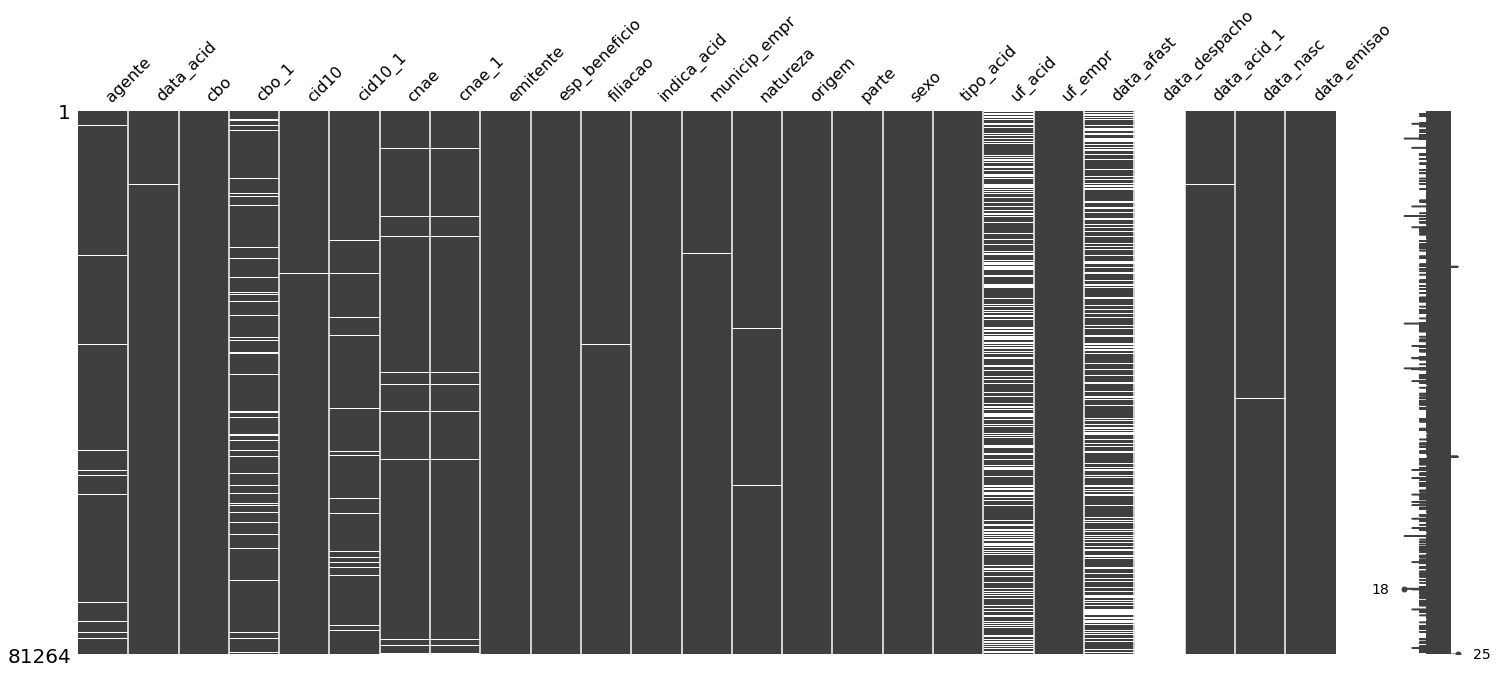

In [132]:
#Verificando a distribuição dos valores nulos

import missingno as msno
msno.matrix(dados_cat)
plt.show()

In [135]:
dados_cat.dtypes

agente            object
data_acid         object
cbo              float64
cbo_1             object
cid10             object
cid10_1           object
cnae             float64
cnae_1            object
emitente          object
esp_beneficio     object
filiacao          object
indica_acid       object
municip_empr      object
natureza          object
origem            object
parte             object
sexo              object
tipo_acid         object
uf_acid           object
uf_empr           object
data_afast        object
data_despacho     object
data_acid_1       object
data_nasc         object
data_emisao       object
dtype: object

In [25]:
#Lendo o csv para retornar ao trabalho
dados_cat = pd.read_csv('cat_com_NaNs.csv', index_col = 0)

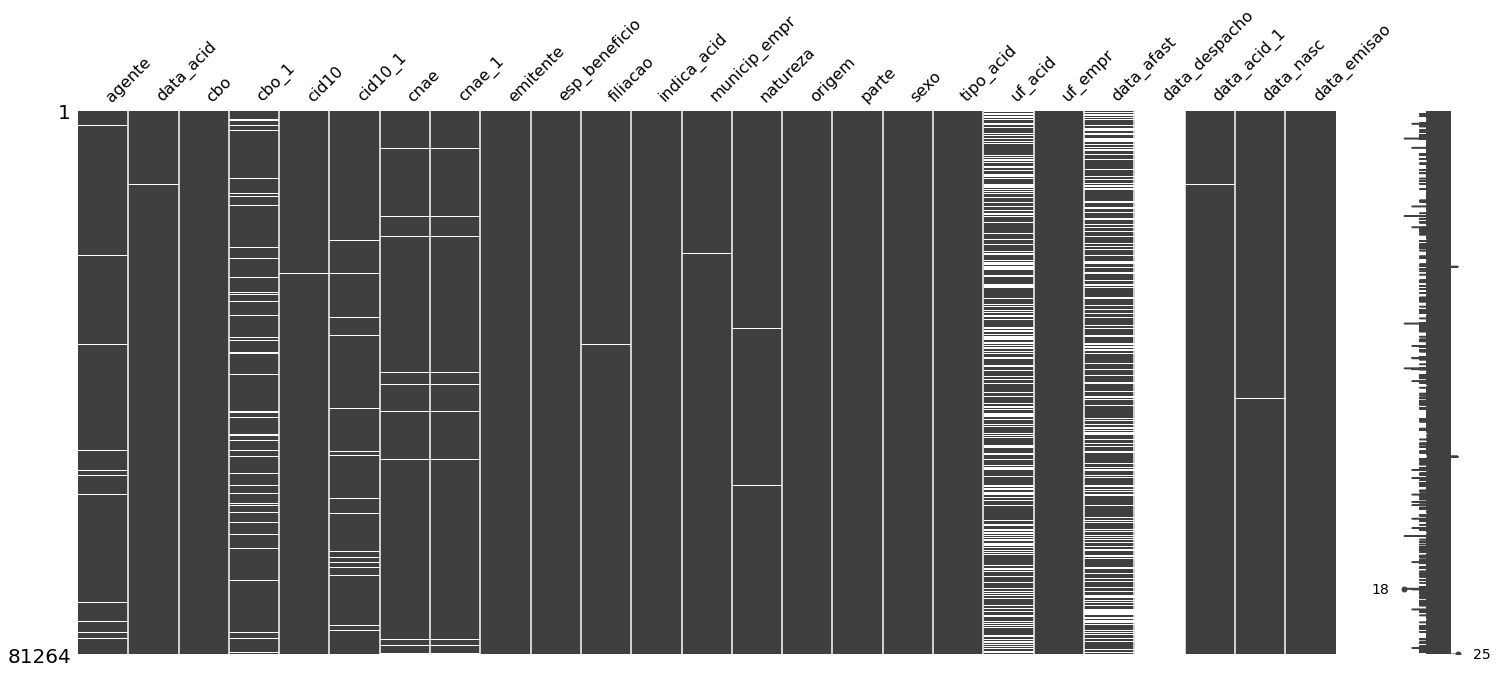

In [12]:
#Verificando a distribuição dos valores nulos

import missingno as msno
msno.matrix(dados_cat)
plt.show()

In [26]:

#Tratamento de NaNs
dados_cat.agente.fillna("agente não informado", inplace=True)
dados_cat.data_acid.fillna("data acidente não informada", inplace=True)
dados_cat.cid10.fillna("cid10 não informado", inplace=True)
dados_cat.cnae.fillna("cnae não informado", inplace=True)
dados_cat.natureza.fillna("natureza não informada", inplace=True)
dados_cat.parte.fillna("parte não informada", inplace=True)
dados_cat.data_afast.fillna("sem afastamento", inplace=True)

dados_cat.drop('data_despacho', axis=1, inplace=True)

#Transformando colunas en categorias
dados_cat.agente = dados_cat.agente.astype('category')
dados_cat.cbo = dados_cat.cbo.astype('category')
dados_cat.data_acid = dados_cat.data_acid.astype('category')
dados_cat.cid10 = dados_cat.cid10.astype('category')
dados_cat.cnae = dados_cat.cnae.astype('category')
dados_cat.emitente = dados_cat.emitente.astype('category')
dados_cat.parte = dados_cat.parte.astype('category')
dados_cat.sexo = dados_cat.sexo.astype('category')
dados_cat.tipo_acid = dados_cat.tipo_acid.astype('category')
dados_cat.data_afast = dados_cat.data_afast.astype('category')

dados_cat.data_acid_1 = dados_cat.data_acid_1.astype('datetime64')
dados_cat.data_nasc = dados_cat.data_nasc.astype('datetime64')
dados_cat.data_emisao = dados_cat.data_emisao.astype('datetime64')




In [27]:
dados_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81264 entries, 0 to 81263
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   agente         81264 non-null  category      
 1   data_acid      81264 non-null  category      
 2   cbo            81244 non-null  category      
 3   cbo_1          72888 non-null  object        
 4   cid10          81264 non-null  category      
 5   cid10_1        78224 non-null  object        
 6   cnae           81264 non-null  category      
 7   cnae_1         79976 non-null  object        
 8   emitente       81264 non-null  category      
 9   esp_beneficio  81264 non-null  object        
 10  filiacao       81255 non-null  object        
 11  indica_acid    81264 non-null  object        
 12  municip_empr   81242 non-null  object        
 13  natureza       81264 non-null  object        
 14  origem         81264 non-null  object        
 15  parte          8126

In [42]:
dados_cat[["uf_empr"]].value_counts()

uf_empr             
São Paulo               29551
Minas Gerais             8696
Rio Grande do Sul        7003
Paraná                   6850
Santa Catarina           5358
Rio de Janeiro           5060
Goiás                    2325
Bahia                    2003
Mato Grosso              1946
Espírito Santo           1899
Pernambuco               1598
Pará                     1363
Mato Grosso do Sul       1341
Ceará                    1237
Distrito Federal         1036
Amazonas                  821
Rio Grande do Norte       551
Alagoas                   478
Rondônia                  474
Maranhão                  460
Paraíba                   331
Sergipe                   304
Piauí                     204
Tocantins                 174
Roraima                    76
Acre                       64
Amapá                      61
dtype: int64

In [43]:
dados_cat[["uf_acid"]].value_counts()

uf_acid             
Maranhão                29174
Rondônia                 8758
Roraima                  6776
Tocantins                5132
Pará                     1613
Acre                     1390
Ceará                    1028
Pernambuco                486
Amazonas                  348
Piauí                     307
Amapá                     227
Sergipe                   186
Alagoas                    84
Rio Grande Norte           68
Paraíba                    60
dtype: int64

In [44]:
dados_cat.drop('uf_acid', axis=1, inplace=True)

In [45]:
dados_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81264 entries, 0 to 81263
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   agente         81264 non-null  category      
 1   data_acid      81264 non-null  category      
 2   cbo            81244 non-null  category      
 3   cbo_1          72888 non-null  object        
 4   cid10          81264 non-null  category      
 5   cid10_1        78224 non-null  object        
 6   cnae           81264 non-null  category      
 7   cnae_1         79976 non-null  object        
 8   emitente       81264 non-null  category      
 9   esp_beneficio  81264 non-null  object        
 10  filiacao       81255 non-null  object        
 11  indica_acid    81264 non-null  object        
 12  municip_empr   81242 non-null  object        
 13  natureza       81264 non-null  object        
 14  origem         81264 non-null  object        
 15  parte          8126

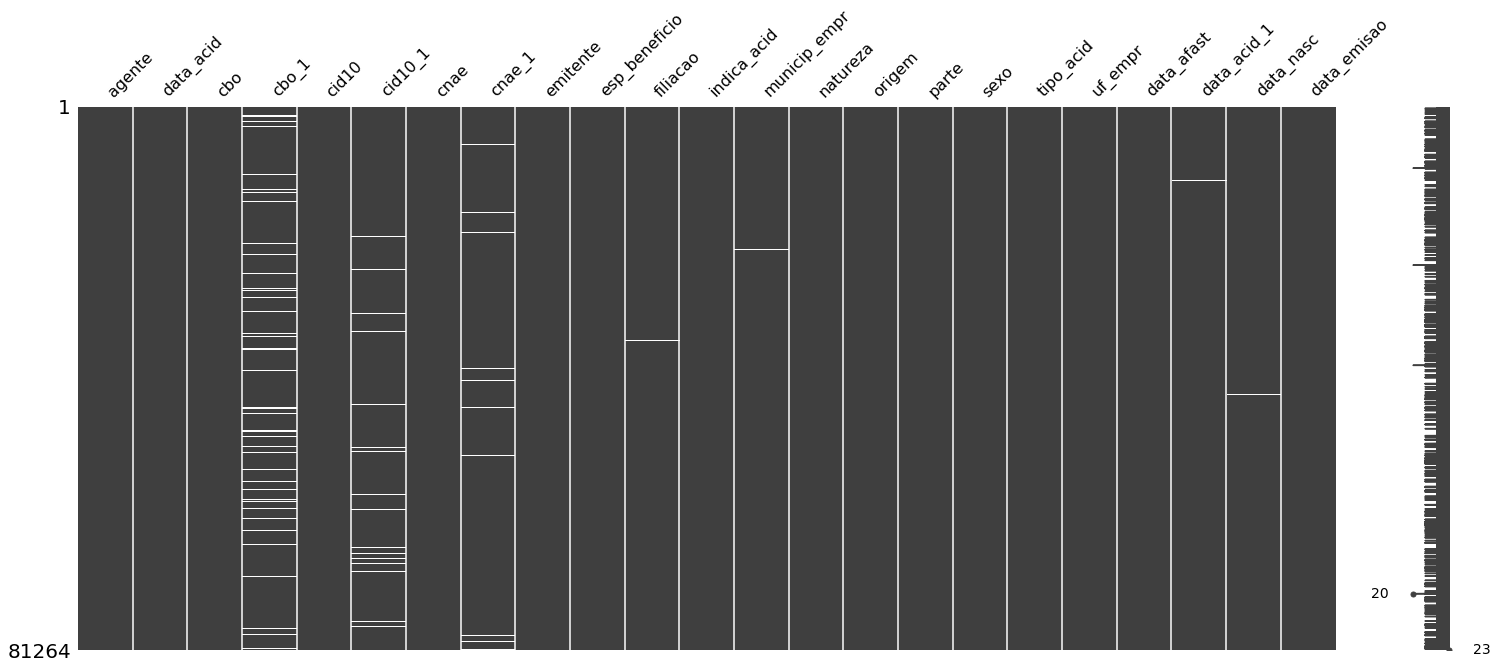

In [46]:
msno.matrix(dados_cat)
plt.show()

In [47]:
#A coluna uf_acid parece estar com dados incorretos, usarei somente a uf_empr
dados_cat.uf_empr = dados_cat.uf_empr.astype('category')

In [128]:
dados_cat.to_csv('cat_sem_NaNs.csv')

In [3]:
#Lendo o arquivo de novo para limpar as categorias
df = pd.read_csv('cat_sem_NaNs.csv', index_col = 0)

In [4]:
#Transformando o dtype da coluna CBO
df.cbo = df.cbo.astype('string')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81264 entries, 0 to 81263
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   agente         81264 non-null  object
 1   data_acid      81264 non-null  object
 2   cbo            81244 non-null  string
 3   cbo_1          72888 non-null  object
 4   cid10          81264 non-null  object
 5   cid10_1        78224 non-null  object
 6   cnae           81264 non-null  object
 7   cnae_1         79976 non-null  object
 8   emitente       81264 non-null  object
 9   esp_beneficio  81264 non-null  object
 10  filiacao       81255 non-null  object
 11  indica_acid    81264 non-null  object
 12  municip_empr   81242 non-null  object
 13  natureza       81264 non-null  object
 14  origem         81264 non-null  object
 15  parte          81264 non-null  object
 16  sexo           81264 non-null  object
 17  tipo_acid      81264 non-null  object
 18  uf_empr        81264 non-n

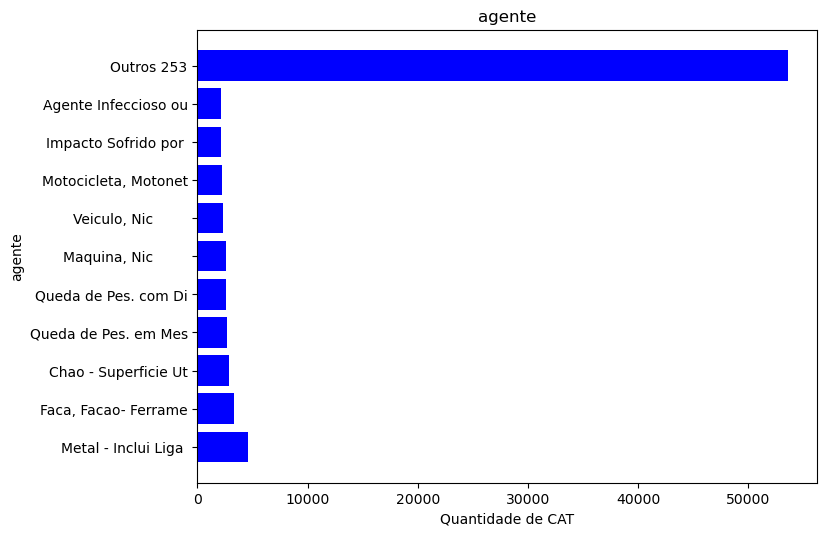

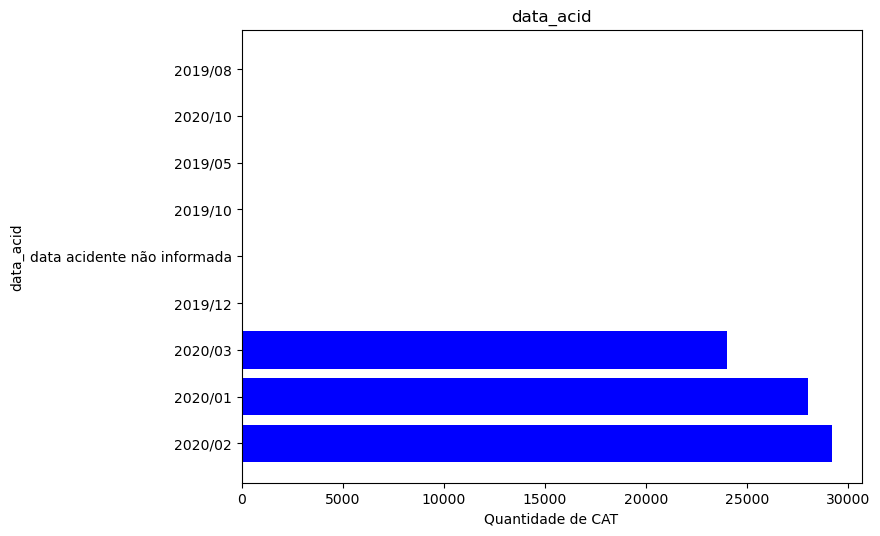

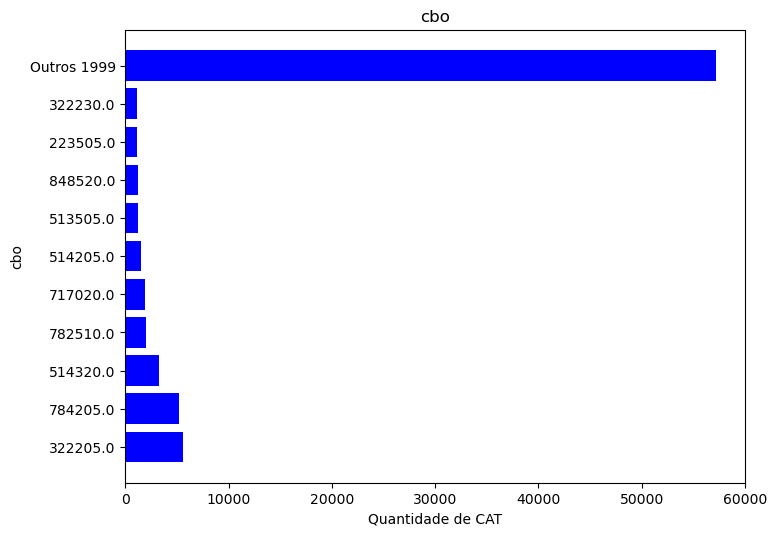

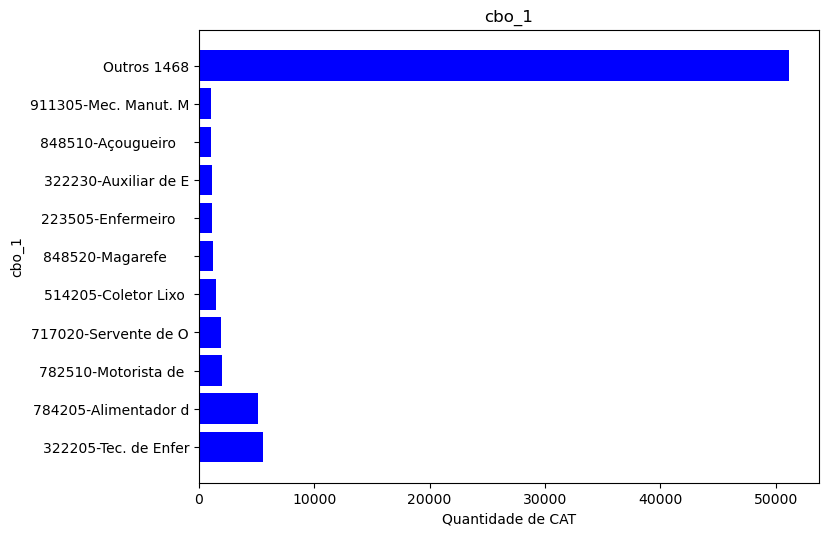

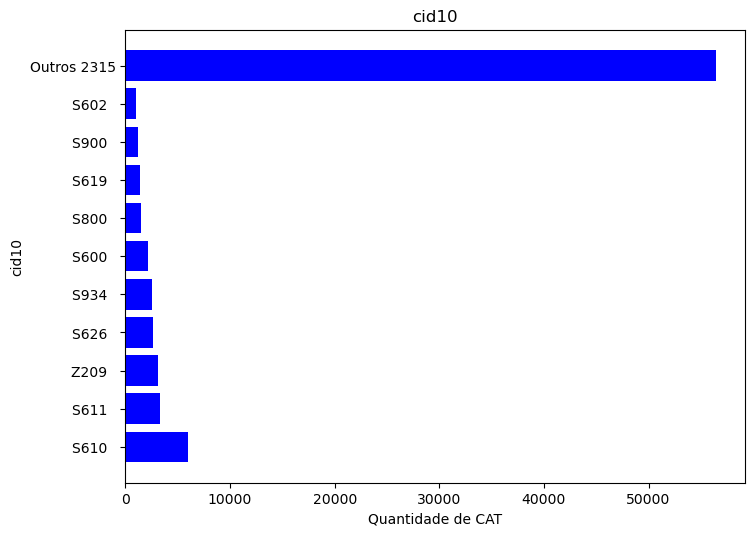

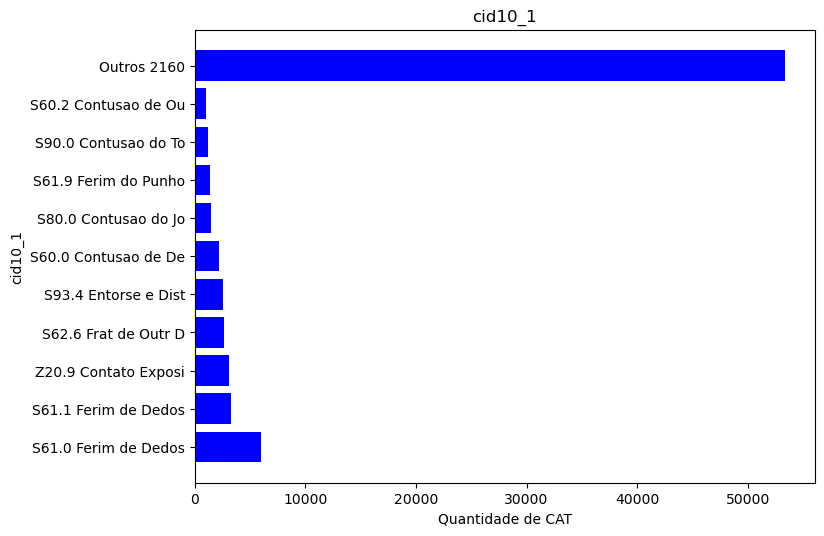

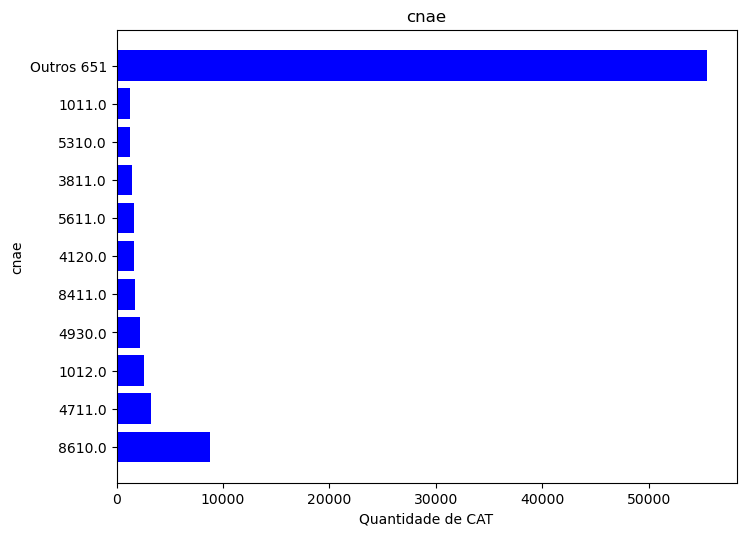

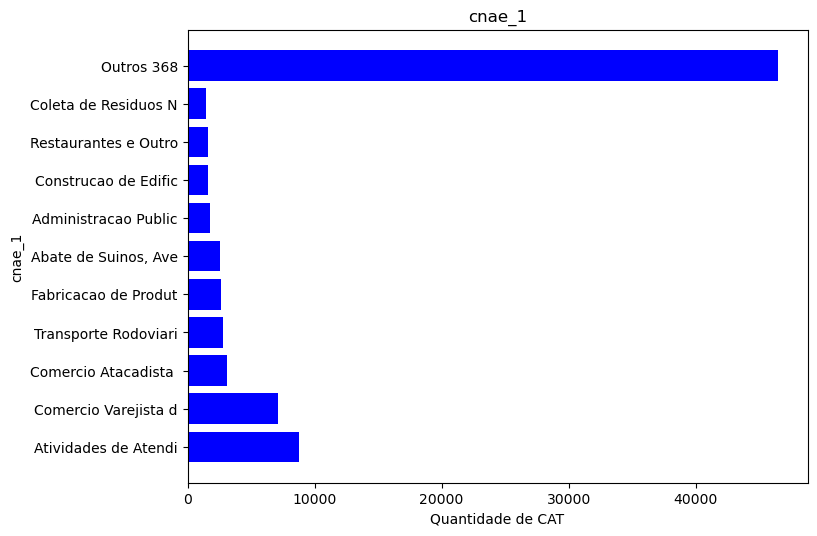

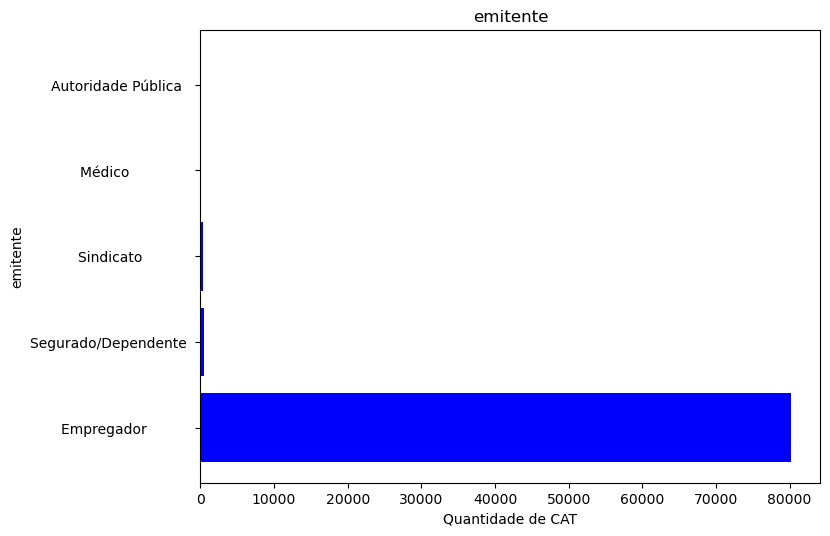

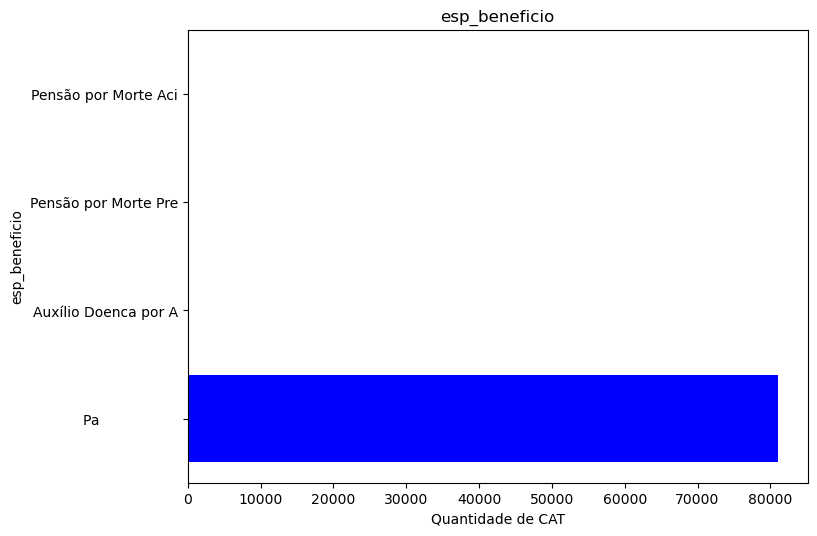

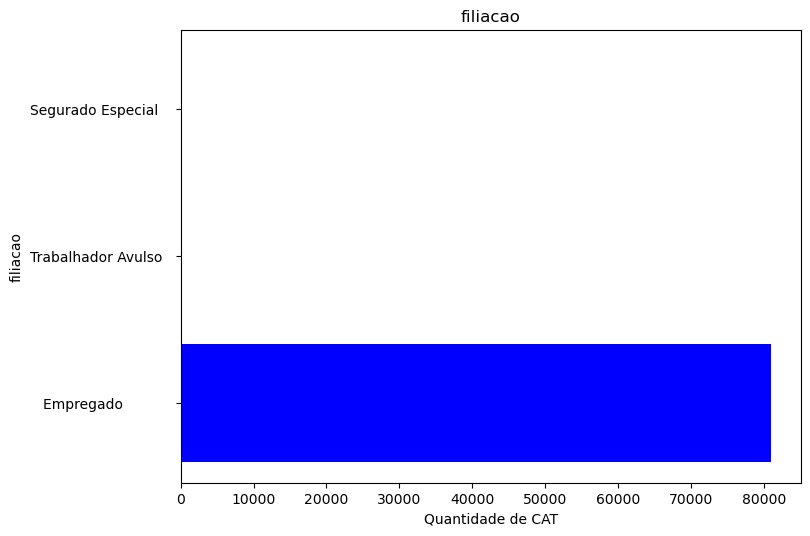

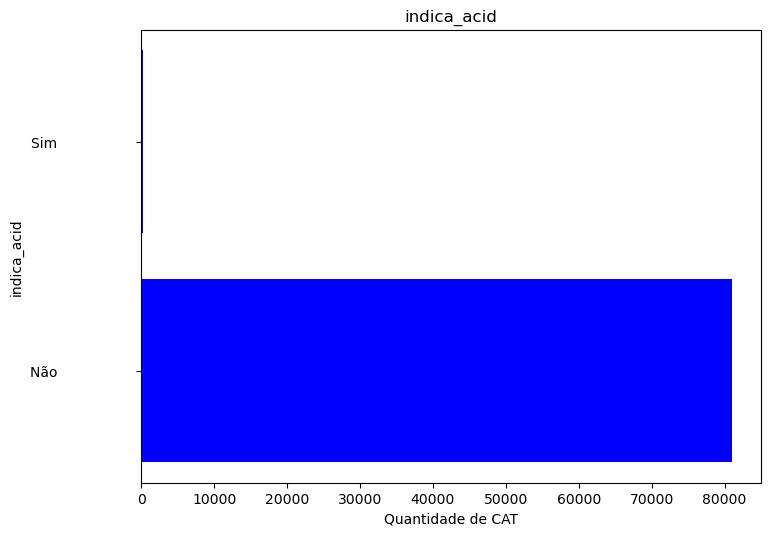

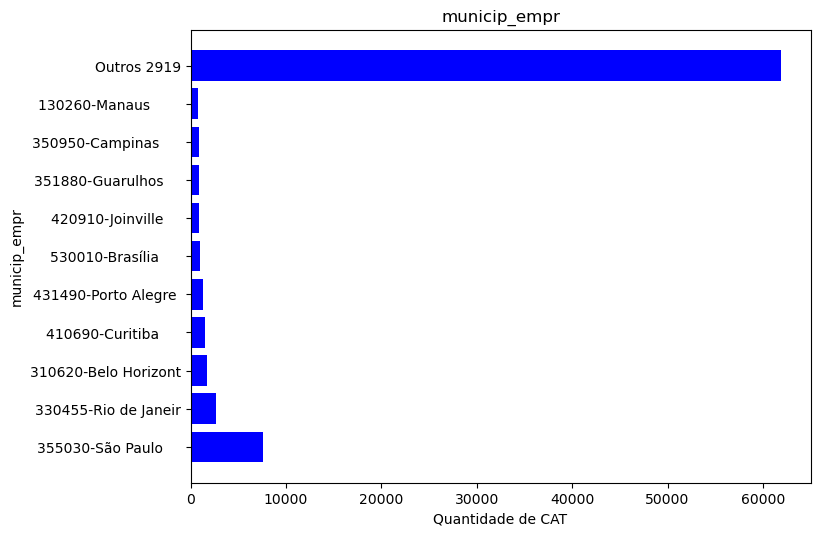

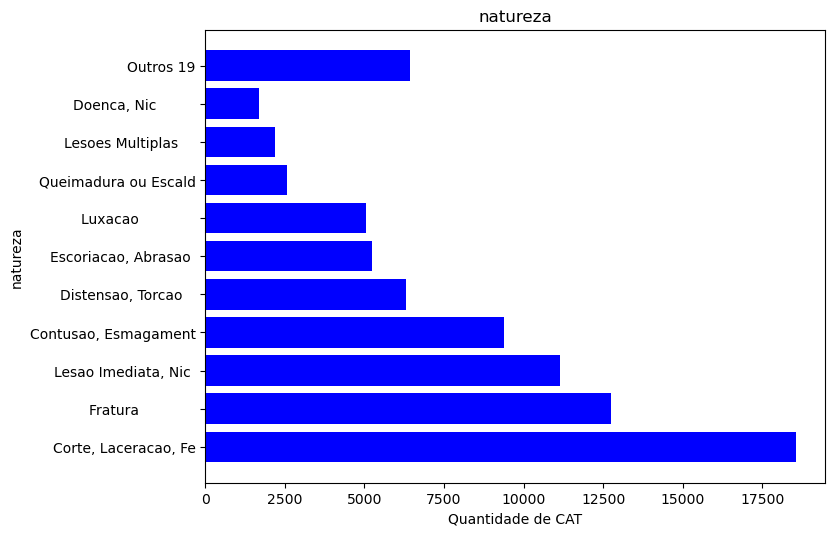

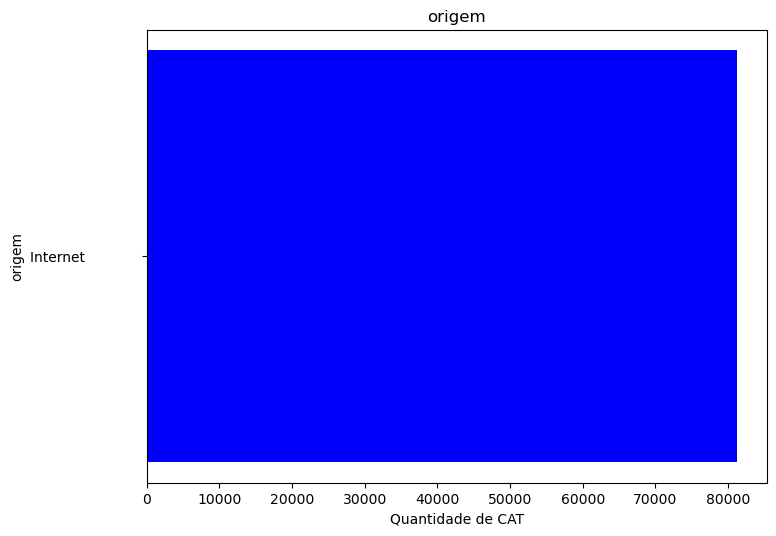

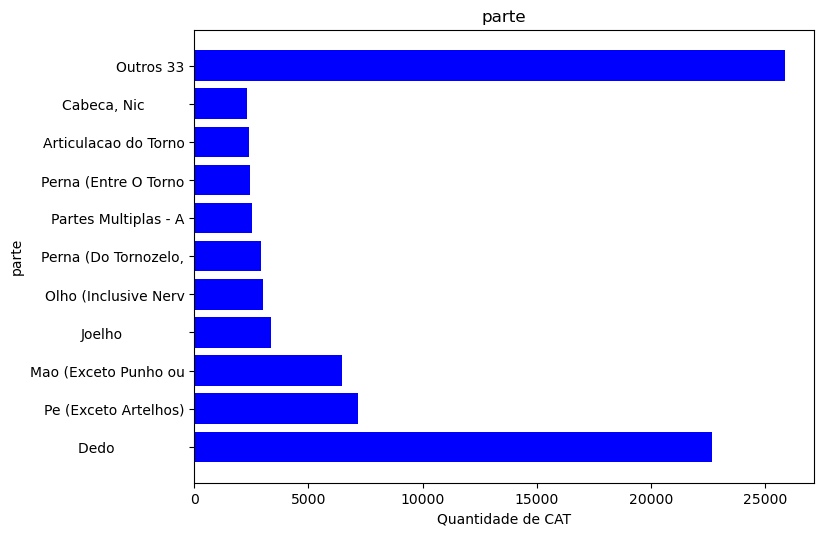

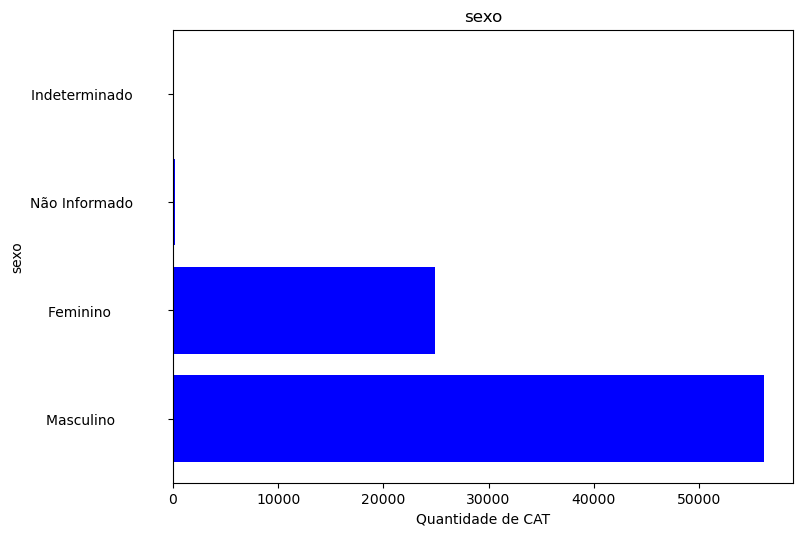

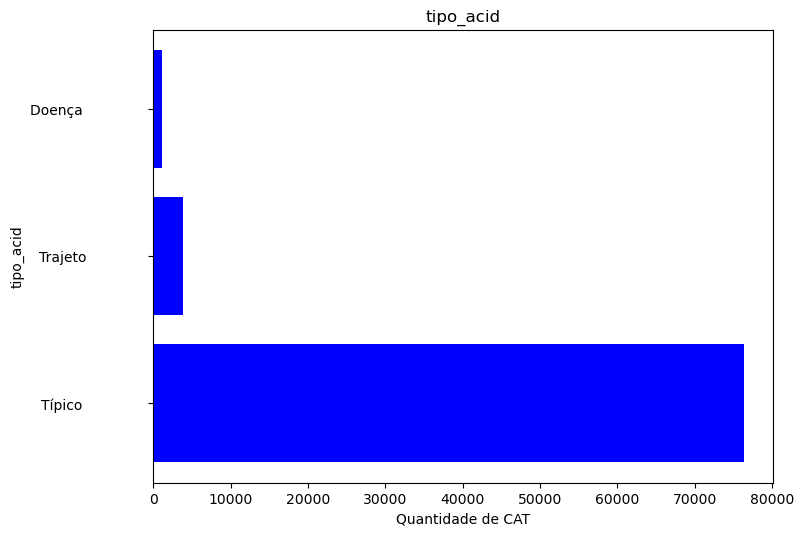

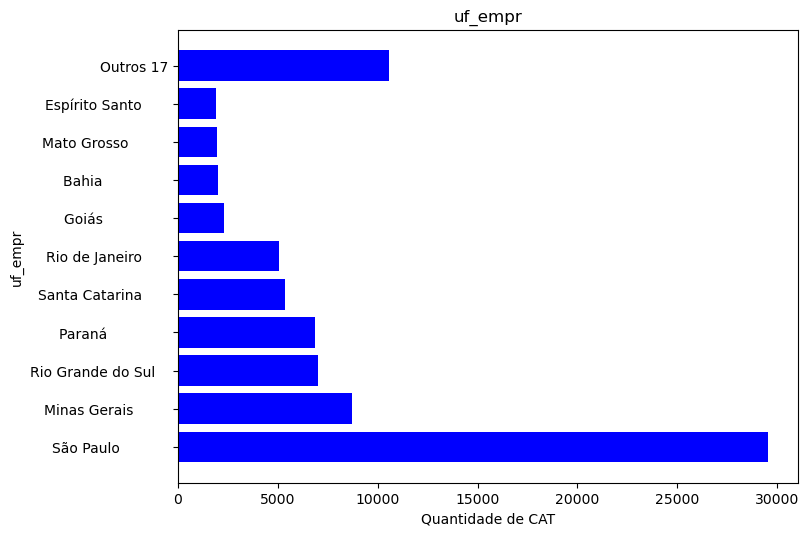

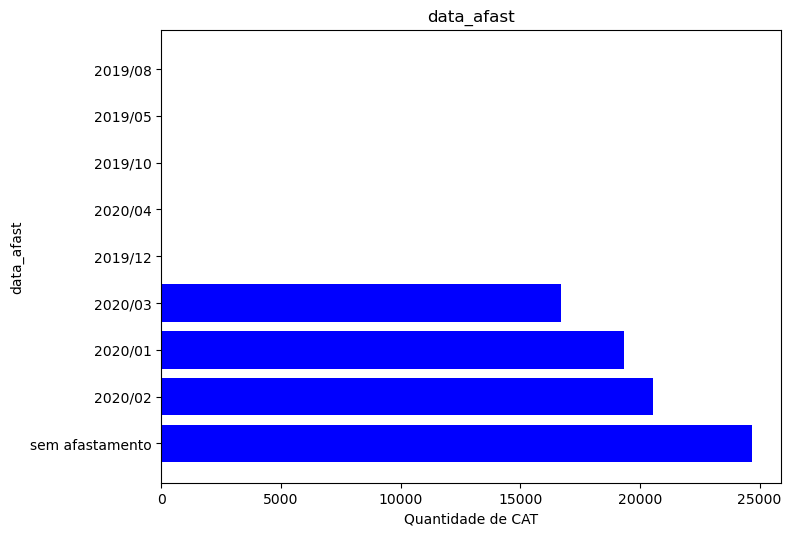

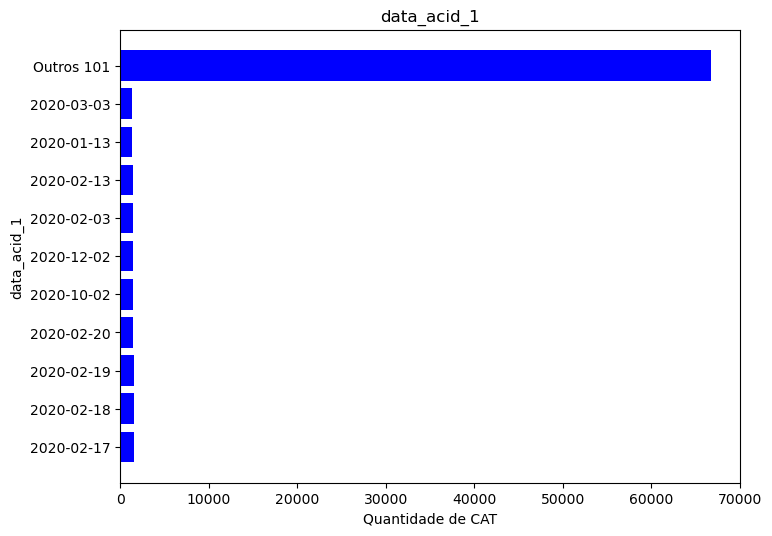

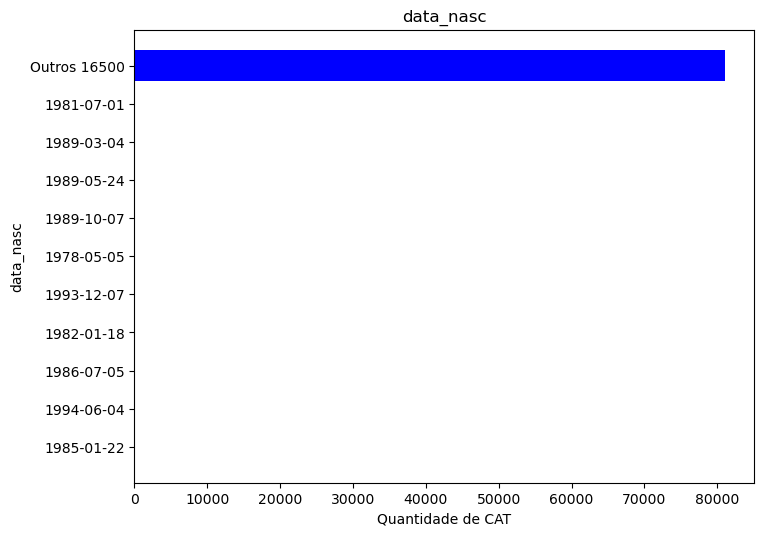

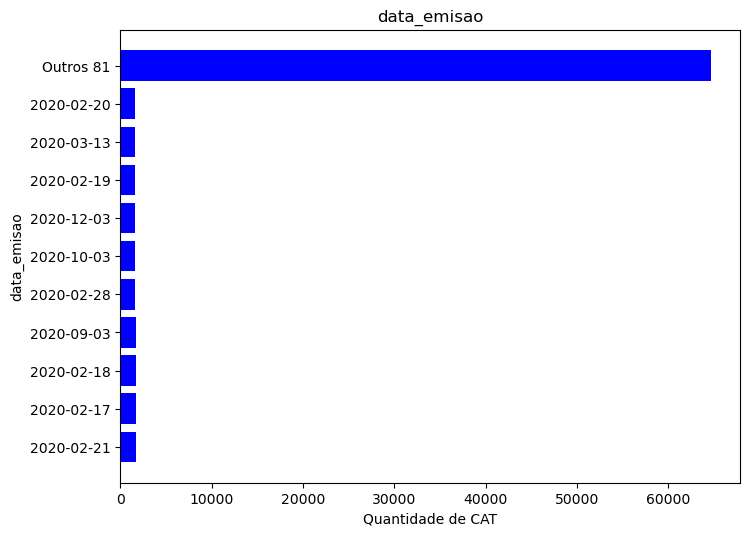

In [5]:
#Análise Univariada

from matplotlib.pyplot import figure

colunas = ['agente', 'data_acid', 'cbo', 'cbo_1', 'cid10', 'cid10_1', 'cnae',
       'cnae_1', 'emitente', 'esp_beneficio', 'filiacao', 'indica_acid',
       'municip_empr', 'natureza', 'origem', 'parte', 'sexo', 'tipo_acid',
       'uf_empr', 'data_afast', 'data_acid_1', 'data_nasc', 'data_emisao']

for s in colunas:
    figure(figsize=(8, 6), dpi=100)
    
    i = 10 #Quantidade de itens a serem apresentados
    
    coluna = s # Coluna a ser representada
    
    eixo_colunas = (df[coluna].value_counts()[:i].to_frame().reset_index()).sort_values(coluna, ascending=False).iloc[:,0]
    eixo_quantidades = (df[coluna].value_counts()[:i].to_frame().reset_index()).sort_values(coluna, ascending=False).iloc[:,1]
    
    if df[coluna].value_counts().size > i:
        texto = "Outros " + str(df[coluna].value_counts()[i:].size)
        eixo_colunas = eixo_colunas.append(pd.Series(texto, index = [i]))
        eixo_quantidades = eixo_quantidades.append(pd.Series(df[coluna].value_counts()[i:].sum(), index = [i]))
    
    plt.barh(eixo_colunas,
           eixo_quantidades,
           color = 'blue')

    plt.xlabel('Quantidade de CAT')
    plt.ylabel(coluna)
    plt.title(coluna)

    plt.show()


In [8]:
#Verificando a cardinalidade das variáveis
df[colunas].nunique().sort_values(ascending=False)

data_nasc        16510
municip_empr      2929
cid10             2325
cid10_1           2170
cbo               2009
cbo_1             1478
cnae               661
cnae_1             378
agente             263
data_acid_1        111
data_emisao         91
parte               43
natureza            29
uf_empr             27
data_acid            9
data_afast           9
emitente             5
sexo                 4
esp_beneficio        4
filiacao             3
tipo_acid            3
indica_acid          2
origem               1
dtype: int64